In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
# The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names= iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

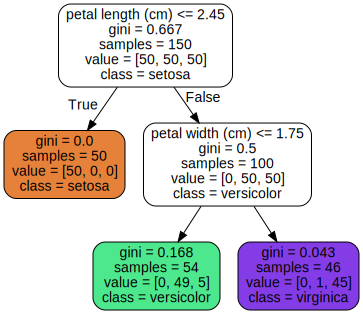

In [27]:
import graphviz 
with open("images/decision_trees/iris_tree.dot") as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='iris_tree', directory='images/decision_trees', cleanup=True)
dot

In [18]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [21]:
tree_clf.predict([[5, 1.5]])

array([1])

In [22]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [28]:
export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "iris_reg.dot"),
#     feature_names= iris.feature_names[2:],
#     class_names=iris.target_names,
    rounded=True,
    filled=True
)

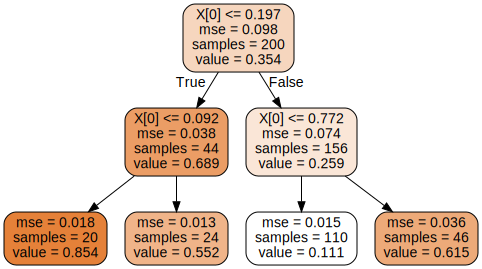

In [29]:
import graphviz 
with open("images/decision_trees/iris_reg.dot") as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='iris_reg', directory='images/decision_trees', cleanup=True)
dot